In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp
from dfply import *
import seaborn as sns
import scikitplot as skplt

from fancyimpute import MICE
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neural_network import MLPClassifier as MLP 
from sklearn.metrics import classification_report


from sklearn.metrics import roc_curve, accuracy_score, mean_squared_error,recall_score,roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint
from sklearn.externals import joblib



%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8


### EDA

In [52]:
pred_main_data = pd.read_csv('data/predictive_maintenance_dataset.csv',parse_dates = ['time_stamp'])

In [53]:
print(pred_main_data.shape)

(144203, 27)


In [4]:
pred_main_data.head()

,unit_number,time_stamp,status,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,540,2017-02-19 12:00:00,0,42.0007,0.8415,High,445.00,NaN,1362.47,1143.17,...,133.75,2388.50,8129.92,9.1182,NaN,332.0,2212.0,100.00,10.77,6.5717
1,396,2017-11-21 12:00:00,0,-0.0023,0.0004,High,518.67,642.33,1581.03,1400.06,...,522.19,2388.00,8135.70,8.3817,0.03,393.0,2388.0,100.00,39.07,23.3958
2,513,2017-02-12 12:00:00,0,NaN,0.6216,Low,462.54,536.71,1250.87,1037.52,...,163.11,2028.06,7867.90,10.8827,NaN,306.0,1915.0,84.93,14.33,8.6202
3,211,2014-06-05 12:00:00,0,42.0006,NaN,High,NaN,549.28,1349.42,1114.02,...,130.58,2387.71,8074.81,9.3776,0.02,NaN,2212.0,100.00,10.60,6.2614
4,460,2014-11-27 12:00:00,0,-0.0016,0.0004,High,518.67,643.84,1604.53,1431.41,...,519.44,2388.24,8135.95,8.5223,0.03,396.0,2388.0,100.00,38.39,23.0682


### Looking at types

In [5]:
(pred_main_data.dtypes)

unit_number                       int64
time_stamp               datetime64[ns]
status                            int64
operational_setting_1           float64
operational_setting_2           float64
operational_setting_3            object
sensor_measurement_1            float64
sensor_measurement_2            float64
sensor_measurement_3            float64
sensor_measurement_4            float64
sensor_measurement_5            float64
sensor_measurement_6            float64
sensor_measurement_7            float64
sensor_measurement_8            float64
sensor_measurement_9            float64
sensor_measurement_10           float64
sensor_measurement_11           float64
sensor_measurement_12           float64
sensor_measurement_13           float64
sensor_measurement_14           float64
sensor_measurement_15           float64
sensor_measurement_16           float64
sensor_measurement_17           float64
sensor_measurement_18           float64
sensor_measurement_19           float64


### Checking for missing values

In [6]:
pred_main_data.isnull().sum()

unit_number                 0
time_stamp                  0
status                      0
operational_setting_1    7141
operational_setting_2    7196
operational_setting_3    7227
sensor_measurement_1     7209
sensor_measurement_2     7198
sensor_measurement_3     7190
sensor_measurement_4     7335
sensor_measurement_5     7244
sensor_measurement_6     7444
sensor_measurement_7     7213
sensor_measurement_8     7276
sensor_measurement_9     7207
sensor_measurement_10    7191
sensor_measurement_11    7180
sensor_measurement_12    7227
sensor_measurement_13    7115
sensor_measurement_14    7068
sensor_measurement_15    7257
sensor_measurement_16    7059
sensor_measurement_17    7167
sensor_measurement_18    7265
sensor_measurement_19    7195
sensor_measurement_20    7018
sensor_measurement_21    7165
dtype: int64

**Almost 50% of all columns/features have missing values**

In [7]:
pred_main_data.isnull().mean()

unit_number              0.000000
time_stamp               0.000000
status                   0.000000
operational_setting_1    0.049520
operational_setting_2    0.049902
operational_setting_3    0.050117
sensor_measurement_1     0.049992
sensor_measurement_2     0.049916
sensor_measurement_3     0.049860
sensor_measurement_4     0.050866
sensor_measurement_5     0.050235
sensor_measurement_6     0.051622
sensor_measurement_7     0.050020
sensor_measurement_8     0.050457
sensor_measurement_9     0.049978
sensor_measurement_10    0.049867
sensor_measurement_11    0.049791
sensor_measurement_12    0.050117
sensor_measurement_13    0.049340
sensor_measurement_14    0.049014
sensor_measurement_15    0.050325
sensor_measurement_16    0.048952
sensor_measurement_17    0.049701
sensor_measurement_18    0.050380
sensor_measurement_19    0.049895
sensor_measurement_20    0.048668
sensor_measurement_21    0.049687
dtype: float64

### Checking the count of the label/target variable

### Gives a very imbalanced data set

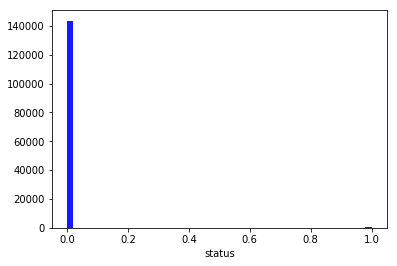

In [8]:
sns.distplot(pred_main_data['status'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

**Shows very expected behaviour of the value of failure (1) of turbines being very few. This makes sense.**

In [9]:
pred_main_data.status.value_counts()

0    143570
1       633
Name: status, dtype: int64

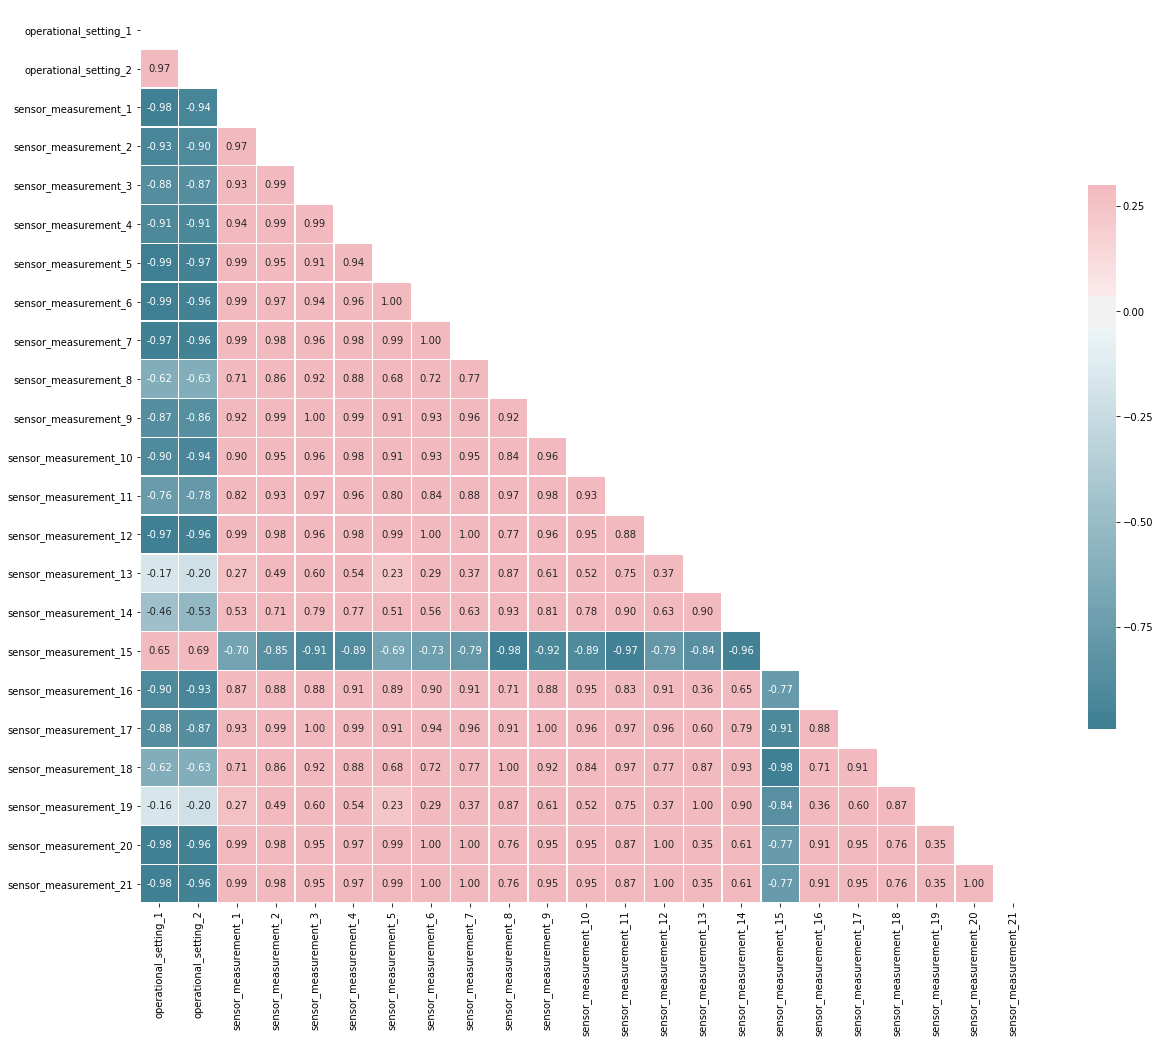

In [10]:
### source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = pred_main_data.select_dtypes(include = ['float64']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', annot_kws={'size': 10})

### Checking if the data is righ-censored (a check to see if all machines fail during their lifetime). If any machine does not fail (status =1) in our data set, the we dont know the exact time of failure. That value is right-censored/hidden from us.

#### No evidence of right censorship in data.

In [11]:
len(pred_main_data.groupby('unit_number').filter(
    lambda x : x['status'].sum() == 1
    ))


144203

### Handling Missing Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024895E30CF8>,
      dtype=object)

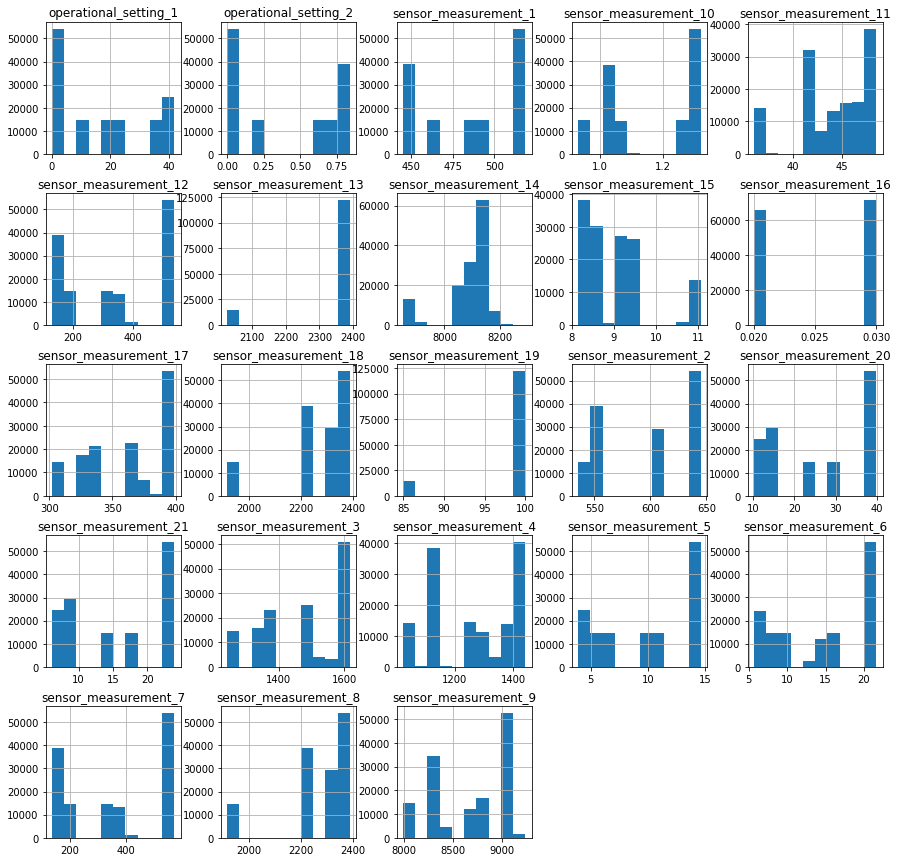

In [12]:
 pred_main_data.select_dtypes(include = ['float64']).hist(figsize = (15,15))

In [13]:
pred_main_data.select_dtypes(include = ['float64']).describe()

,operational_setting_1,operational_setting_2,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,137062.000000,137007.000000,136994.000000,137005.000000,137013.000000,136868.000000,136959.000000,136759.000000,136990.000000,136927.000000,...,136976.000000,137088.000000,137135.000000,136946.000000,137144.000000,137036.000000,136938.000000,137008.000000,137185.000000,137038.000000
mean,17.075966,0.406348,486.132686,597.771761,1468.144709,1262.295400,9.935961,14.487827,361.227447,2274.757600,...,340.434790,2349.903834,8089.449809,9.049490,0.025226,360.999569,2274.604843,98.402123,26.050472,15.631200
std,16.534306,0.368293,30.435453,42.514419,118.189101,136.348238,4.268740,6.447176,174.309332,142.335384,...,164.371761,110.837314,80.528884,0.751212,0.004995,31.017661,142.432048,4.639714,11.703273,7.022004
min,-0.008700,-0.000600,445.000000,535.480000,1242.980000,1023.770000,3.910000,5.670000,136.170000,1914.720000,...,128.450000,2027.570000,7848.360000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.091800
25%,0.001200,0.000200,449.440000,549.990000,1357.620000,1127.060000,5.480000,8.000000,175.730000,2212.130000,...,164.820000,2387.970000,8070.750000,8.437700,0.020000,332.000000,2212.000000,100.000000,14.340000,8.604525
50%,10.007800,0.251900,491.190000,606.520000,1493.670000,1293.970000,10.520000,15.460000,392.840000,2323.690000,...,370.220000,2388.070000,8119.710000,8.741350,0.030000,368.000000,2324.000000,100.000000,28.250000,16.944950
75%,35.001300,0.840000,518.670000,642.350000,1586.720000,1402.300000,14.620000,21.610000,553.320000,2388.050000,...,521.370000,2388.160000,8139.630000,9.343700,0.030000,392.000000,2388.000000,100.000000,38.830000,23.299000
max,42.008000,0.842000,518.670000,645.110000,1616.910000,1441.160000,14.620000,21.610000,570.810000,2388.640000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.890000,23.950500


Source: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
    
**Assumption**

We are making an assumption here that the data was not excluded on purpose but was excluded randomly due to maybe sensor failure. Then the data would be classified as Missing Completely at Random (MCAR) or Missing at Random (MAR)


In [14]:
incomplete = pred_main_data.select_dtypes(include = ['float64']).values.copy()

### Filling NA's using multiple Imputation

In [15]:
### Source: 
mice = MICE()
complete = mice.complete(incomplete)

[MICE] Completing matrix with shape (144203, 23)
[MICE] Starting imputation round 1/110, elapsed time 0.116
[MICE] Starting imputation round 2/110, elapsed time 3.081
[MICE] Starting imputation round 3/110, elapsed time 5.940
[MICE] Starting imputation round 4/110, elapsed time 8.624
[MICE] Starting imputation round 5/110, elapsed time 11.425
[MICE] Starting imputation round 6/110, elapsed time 14.280
[MICE] Starting imputation round 7/110, elapsed time 17.122
[MICE] Starting imputation round 8/110, elapsed time 19.988
[MICE] Starting imputation round 9/110, elapsed time 22.720
[MICE] Starting imputation round 10/110, elapsed time 25.624
[MICE] Starting imputation round 11/110, elapsed time 28.489
[MICE] Starting imputation round 12/110, elapsed time 31.369
[MICE] Starting imputation round 13/110, elapsed time 34.253
[MICE] Starting imputation round 14/110, elapsed time 37.138
[MICE] Starting imputation round 15/110, elapsed time 40.006
[MICE] Starting imputation round 16/110, elapsed 

In [17]:
df_complete = pd.DataFrame(complete)
df_complete.columns = pred_main_data.select_dtypes(include = ['float64']).columns
df_complete.index = pred_main_data.select_dtypes(include = ['float64']).index

In [19]:
df_complete.describe()

,operational_setting_1,operational_setting_2,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,...,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000,144203.000000
mean,17.069304,0.406398,486.130272,597.762996,1468.121738,1262.247979,9.936294,14.489072,361.325921,2274.751398,...,340.416690,2349.883943,8089.445069,9.049331,0.025227,360.989275,2274.658942,98.401087,26.056467,15.634189
std,16.241167,0.361702,29.917775,41.833053,116.320572,134.097746,4.194620,6.334439,171.291080,139.853589,...,161.536630,108.495637,79.246848,0.738460,0.004908,30.540025,139.938707,4.541984,11.513511,6.905742
min,-0.008700,-0.000600,445.000000,535.480000,1242.980000,1023.770000,3.910000,5.670000,136.170000,1914.720000,...,128.450000,2027.570000,7848.360000,8.156300,0.019539,302.000000,1915.000000,84.930000,10.160000,6.091800
25%,0.001400,0.000200,449.440000,550.140000,1358.330000,1127.700000,5.480000,8.000000,175.940000,2212.120000,...,165.000000,2387.950000,8069.960000,8.441900,0.020000,332.000000,2212.000000,100.000000,14.370000,8.626400
50%,14.631983,0.349349,490.702170,605.970000,1492.934042,1285.020635,10.520000,15.450000,391.470000,2319.270000,...,368.043241,2388.070000,8118.510000,8.908505,0.028383,367.000000,2319.000000,100.000000,28.083683,16.821376
75%,35.000100,0.840000,518.670000,642.310000,1586.170000,1401.480000,14.620000,21.610000,553.230000,2388.050000,...,521.290000,2388.160000,8139.210000,9.346100,0.030000,392.000000,2388.000000,100.000000,38.810000,23.287600
max,42.008000,0.842000,518.670000,645.110000,1616.910000,1441.160000,14.620000,21.610000,570.810000,2388.640000,...,537.490000,2421.260063,8293.720000,11.066900,0.030000,399.000000,2389.590812,101.303847,39.890000,23.950500


### No NA's left

In [20]:
df_complete.isnull().sum()

operational_setting_1    0
operational_setting_2    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64

### Distribution after Imputation. Not much difference between the original and imputed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002489864BAC8>,
      dtype=object)

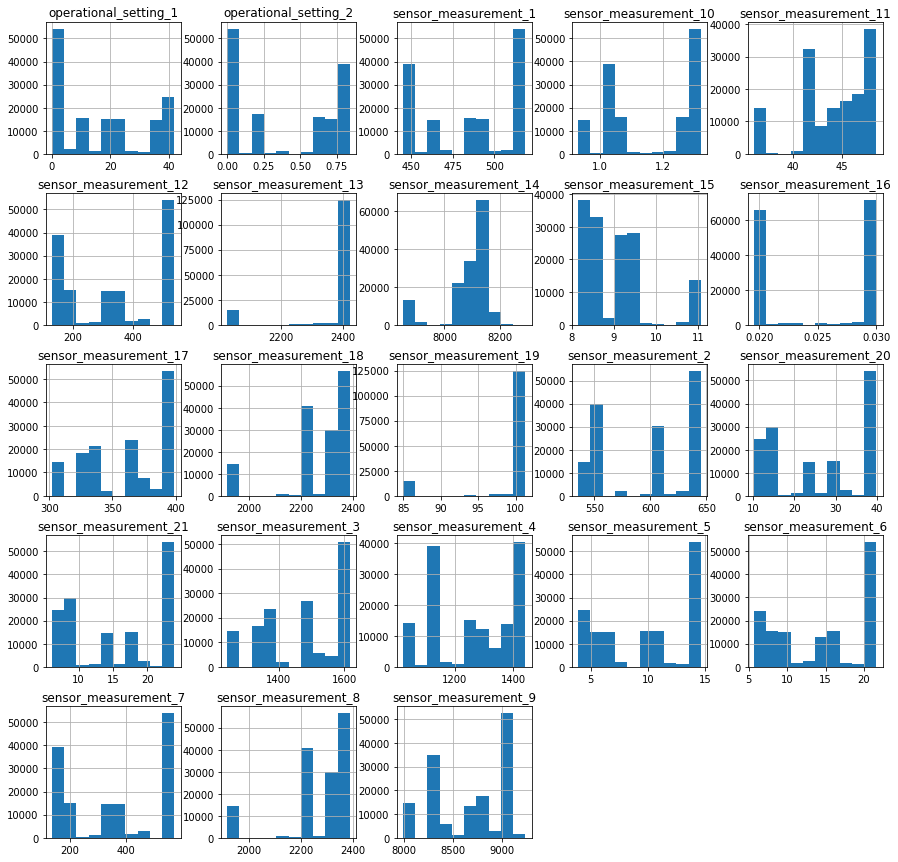

In [21]:
df_complete.hist(figsize = (15,15))

### Replacing the categorical variable NA with the mode of the column.

In [22]:
pred_main_data['operational_setting_3'].fillna(pred_main_data['operational_setting_3'].mode()[0], inplace=True)


In [23]:
pred_main_data['operational_setting_3'].isnull().sum()

0

In [24]:
### Converting categorical variables to dummys. Need only one column - operational_setting_3_High.
pred_main_data = pd.concat([pred_main_data.drop('operational_setting_3', axis = 1),
                    pd.get_dummies(pred_main_data.operational_setting_3,prefix = 'operational_setting_3')[['operational_setting_3_High']]],axis = 1)
pred_main_data.update(df_complete)

In [25]:
pred_main_data.isnull().sum()

unit_number                   0
time_stamp                    0
status                        0
operational_setting_1         0
operational_setting_2         0
sensor_measurement_1          0
sensor_measurement_2          0
sensor_measurement_3          0
sensor_measurement_4          0
sensor_measurement_5          0
sensor_measurement_6          0
sensor_measurement_7          0
sensor_measurement_8          0
sensor_measurement_9          0
sensor_measurement_10         0
sensor_measurement_11         0
sensor_measurement_12         0
sensor_measurement_13         0
sensor_measurement_14         0
sensor_measurement_15         0
sensor_measurement_16         0
sensor_measurement_17         0
sensor_measurement_18         0
sensor_measurement_19         0
sensor_measurement_20         0
sensor_measurement_21         0
operational_setting_3_High    0
dtype: int64

### A check to see if there are multiple failures (multiple 1's). The test below shows there are no mutiple failures.

In [26]:
check_for_mutiple_failures=pred_main_data >> group_by(X.unit_number) >> arrange(X.unit_number,X.time_stamp) >> filter_by(X.status == 1) >> summarize(st_count = X.status.count())
len(check_for_mutiple_failures['st_count']) == len(pred_main_data['unit_number'].unique()) 

C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)
C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)
C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)


True

### A check to see if all failure values are the last row in every grouped frame once it is sorted by time. This returns true. Machine failure (status =1 ) is indeed the last row for every unit.

In [27]:
check_if_last_row_is_status_1 = pred_main_data >> group_by(X.unit_number) >> arrange(X.unit_number,X.time_stamp) >> tail(1)
check_if_last_row_is_status_1['status'][check_if_last_row_is_status_1['status'] == 1].all()

C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)
C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)


True

### Generating labels

In [28]:
df_processed_complete= pred_main_data >> group_by(X.unit_number) >> arrange(X.unit_number,X.time_stamp) >> mutate(status_within_40 = lead(X.status, 40))
df_processed_complete.fillna({'status_within_40':1}, inplace=True)

C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)
C:\Users\sid\Anaconda3\lib\site-packages\dfply\base.py:307: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = df.groupby(df._grouped_by)


In [29]:
df_processed_complete.status_within_40.value_counts()

0.0    118250
1.0     25953
Name: status_within_40, dtype: int64

In [60]:
df_processed_complete.to_csv('processed/imputed_dataset_task1.csv')


In [32]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_processed_complete.drop(['status','status_within_40','time_stamp','unit_number'],axis=1), df_processed_complete[['status_within_40']], test_size=0.15, random_state=9)

# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=9)

In [33]:
# Fitting general models:
model_list = {"Logistic Regression": LR(),
              "Random Forest Classifier": RFC(),
              "Gradient Boosting Classifier": GBC(),
              "XGB Classifier": XBC(),
              "MLP Classifer": MLP(hidden_layer_sizes = (50,100),activation = 'logistic', alpha=0.01),
              "K Nearest Neighbor": KNN() }

Fitting Logistic Regression model...
Train accuracy is: 0.832
Train recall score is: 0.187
Validating Logistic Regression model...
Validation accuracy is: 0.828
Validation recall accuracy is: 0.179
Test accuracy is: 0.841
Test recall accuracy is: 0.194
Confusion Matrix for Logistic Regression model


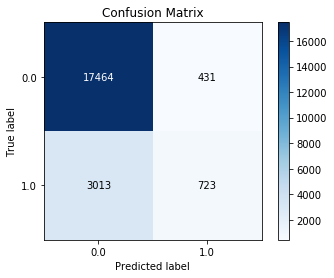

ROC curve for Logistic Regression model with test data


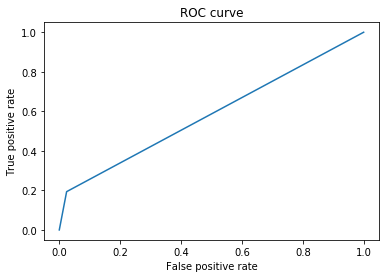

Fitting Random Forest Classifier model...
Train accuracy is: 0.996
Train recall score is: 0.98
Validating Random Forest Classifier model...
Validation accuracy is: 0.939
Validation recall accuracy is: 0.779
Test accuracy is: 0.944
Test recall accuracy is: 0.785
Confusion Matrix for Random Forest Classifier model


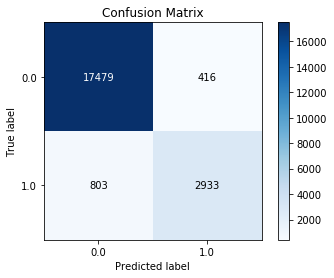

ROC curve for Random Forest Classifier model with test data


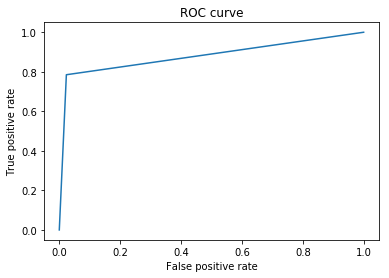

Fitting Gradient Boosting Classifier model...
Train accuracy is: 0.943
Train recall score is: 0.794
Validating Gradient Boosting Classifier model...
Validation accuracy is: 0.938
Validation recall accuracy is: 0.777
Test accuracy is: 0.941
Test recall accuracy is: 0.784
Confusion Matrix for Gradient Boosting Classifier model


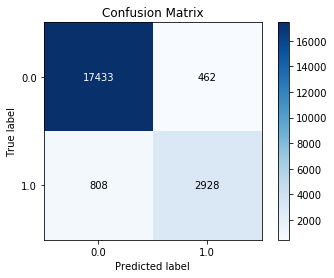

ROC curve for Gradient Boosting Classifier model with test data


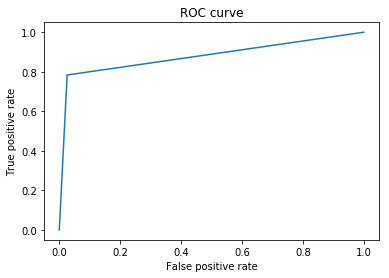

Fitting XGB Classifier model...


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train accuracy is: 0.942


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train recall score is: 0.791
Validating XGB Classifier model...
Validation accuracy is: 0.937
Validation recall accuracy is: 0.771


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy is: 0.94
Test recall accuracy is: 0.773
Confusion Matrix for XGB Classifier model


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


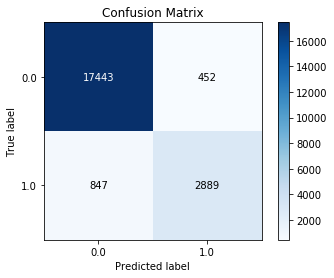

ROC curve for XGB Classifier model with test data


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


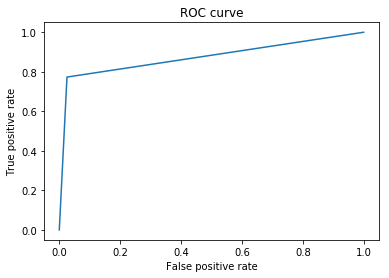

Fitting MLP Classifer model...
Train accuracy is: 0.819
Train recall score is: 0.0
Validating MLP Classifer model...
Validation accuracy is: 0.818
Validation recall accuracy is: 0.0
Test accuracy is: 0.827
Test recall accuracy is: 0.0
Confusion Matrix for MLP Classifer model


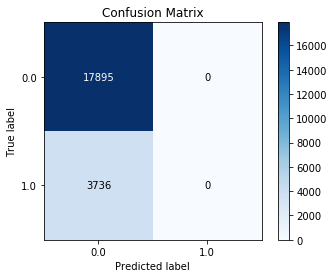

ROC curve for MLP Classifer model with test data


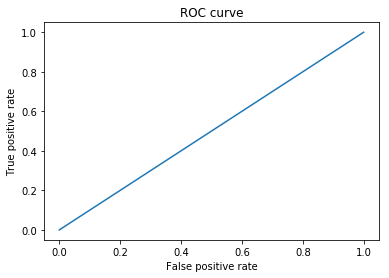

Fitting K Nearest Neighbor model...
Train accuracy is: 0.943
Train recall score is: 0.784
Validating K Nearest Neighbor model...
Validation accuracy is: 0.919
Validation recall accuracy is: 0.704
Test accuracy is: 0.924
Test recall accuracy is: 0.714
Confusion Matrix for K Nearest Neighbor model


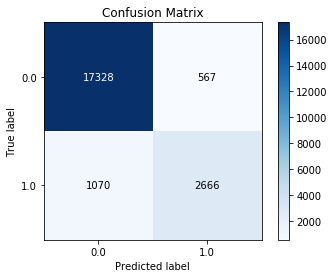

ROC curve for K Nearest Neighbor model with test data


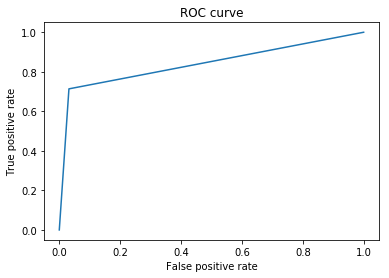

In [35]:
for name, clf in model_list.items():
  
    print("Fitting {} model...".format(name))
    clf.fit(X_train, y_train.values.ravel())
    print("Train accuracy is:", accuracy_score(y_train, clf.predict(X_train)).round(3))
    print("Train recall score is:", recall_score(y_train, clf.predict(X_train)).round(3))
    
    
    print("Validating {} model...".format(name))
    print("Validation accuracy is:", accuracy_score(y_val, clf.predict(X_val)).round(3))
    print("Validation recall accuracy is:", recall_score(y_val, clf.predict(X_val)).round(3))
    
    
    print("Test accuracy is:", accuracy_score(y_test,  clf.predict(X_test)).round(3))
    print("Test recall accuracy is:", recall_score(y_test, clf.predict(X_test)).round(3))
    print("Confusion Matrix for {} model".format(name))
    skplt.metrics.plot_confusion_matrix(y_test,  clf.predict(X_test))
    plt.show()
    
    print("ROC curve for {} model with test data".format(name))
    rocx, rocy, _ = roc_curve(y_test, clf.predict(X_test))
    
    plt.plot(rocx, rocy)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

### HyperParameter Tuning for the Random Forest Classifier model ( gave me the highest accuracy)

In [36]:
rf_clf = RFC()
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100,600, 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 110, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# class_weight
class_weight = ['balanced']
criterion = ["gini","entropy"]


In [41]:
# specify parameters and distributions to sample from

param_dist = {"n_estimators": n_estimators,
              "max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "criterion": criterion,
              "class_weight" : class_weight }


# run randomized search
n_iter_search = 15
rf_random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist,scoring = 'recall',
                                   n_iter=n_iter_search,  n_jobs = -1)
rf_random_search.fit(X_train,y_train.values.ravel())


{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Recall Accuracy: 0.9231257631031414


In [42]:
print(rf_random_search.best_params_)
print("Recall Accuracy:", rfb_random_search.best_score_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Recall Accuracy: 0.9231257631031414


In [46]:
rf_clf_optm = RFC(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 4,max_features= 'sqrt', max_depth= 30, criterion = 'entropy', class_weight ='balanced', bootstrap = False, random_state = 9)  
pprint(rf_clf_optm.get_params())

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}


Fitting......
Validating......
Validation accuracy is: 0.941
Validation recall accuracy is: 0.861
             precision    recall  f1-score   support

    Running       0.97      0.96      0.96     15044
    Failure       0.82      0.86      0.84      3342

avg / total       0.94      0.94      0.94     18386

Testing......
Test accuracy is: 0.947
Test recall accuracy is: 0.877
             precision    recall  f1-score   support

    Running       0.97      0.96      0.97     17895
    Failure       0.83      0.88      0.85      3736

avg / total       0.95      0.95      0.95     21631



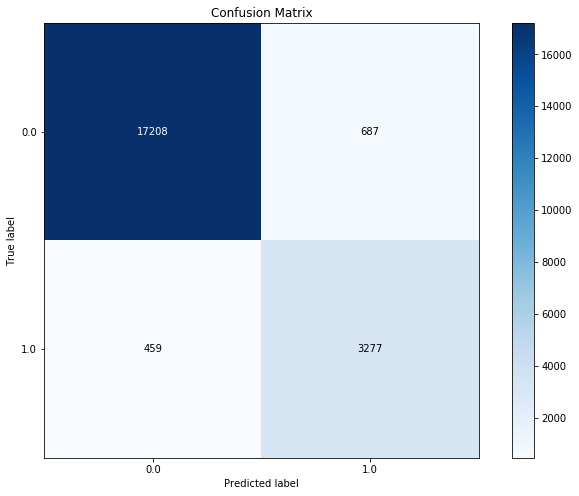

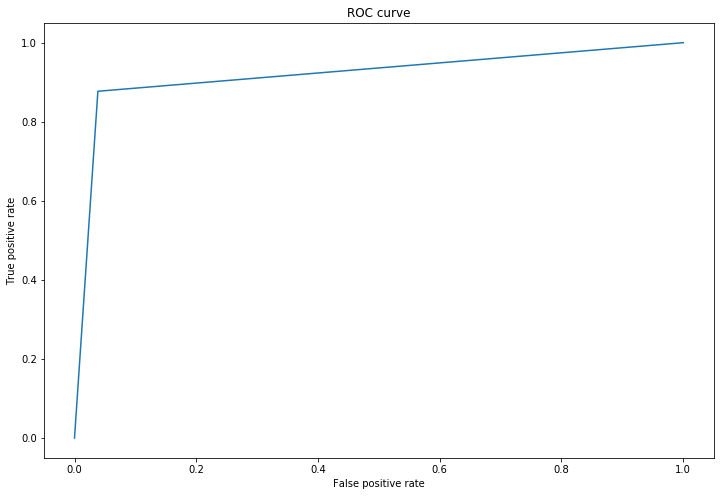

In [48]:
print("Fitting......")

rf_clf_optm.fit(X_train,y_train.values.ravel())

print("Validating......")


print("Validation accuracy is:", accuracy_score(y_val, rf_clf_optm.predict(X_val)).round(3))
print("Validation recall accuracy is:", recall_score(y_val, rf_clf_optm.predict(X_val)).round(3))

print(classification_report(y_val, rf_clf_optm.predict(X_val), target_names=['Running', 'Failure']))


print("Testing......")

print("Test accuracy is:", accuracy_score(y_test,  rf_clf_optm.predict(X_test)).round(3))
print("Test recall accuracy is:", recall_score(y_test, rf_clf_optm.predict(X_test)).round(3))
print(classification_report(y_test,  rf_clf_optm.predict(X_test), target_names=['Running', 'Failure']))

  


skplt.metrics.plot_confusion_matrix(y_test,  rf_clf_optm.predict(X_test))
plt.show()
    
rocx, rocy, _ = roc_curve(y_test, rf_clf_optm.predict(X_test))
    
plt.plot(rocx, rocy)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

### Saving the model

In [58]:
joblib.dump(rf_clf_optm,'models/task1_rfclf_model.pkl')


['models/task1_rfclf_model.pkl']